# Identifying location for the oil well

You have been provided with oil samples in three regions: in each there are 10,000 potential deposits, where the quality of oil and the volume of its reserves have been measured. Build a machine learning model to help determine the region where mining will bring the most profit. Analyze possible profits and risks using the *Bootstrap.* technique

Steps how to choose a location:

- In the selected region, they are looking for deposits, for each, the values of the indicators are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected fields.

## Loading and preparing data

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import pairplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy.random import RandomState
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st
import seaborn


Task: Load and prepare data.
1. Loading data
2. Check for errors, missing values ...

In [2]:
df0 = pd.read_csv('datasets/geo_data_0.csv')
df1 = pd.read_csv('datasets/geo_data_1.csv')
df2 = pd.read_csv('datasets/geo_data_2.csv')

In [3]:
display(df0.head())
display(df1.head())
display(df2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(df0.info())
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(df0.describe())
display(df1.describe())
display(df2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


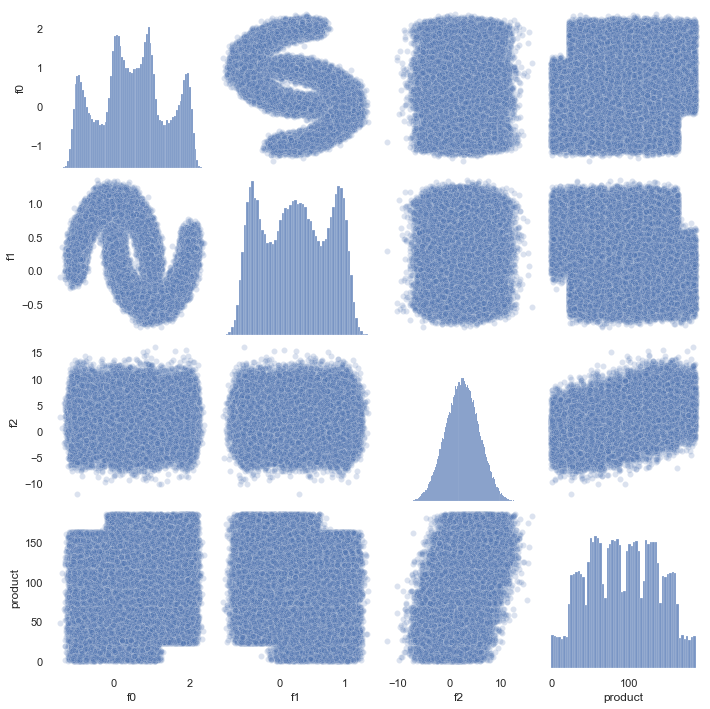

In [6]:
seaborn.set(rc={'axes.facecolor':'white'})
pairplot(df0[['f0', 'f1', 'f2', 'product']], plot_kws={'alpha':0.2})

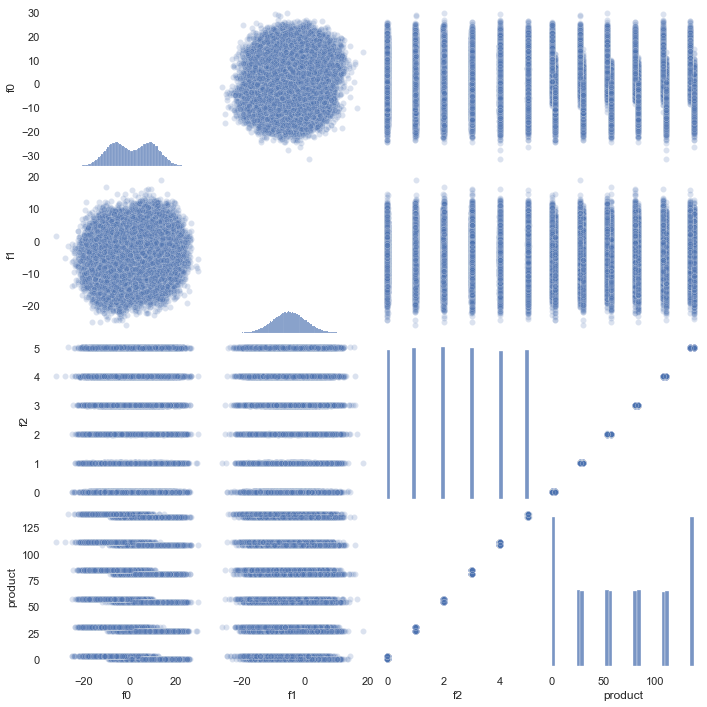

In [7]:
seaborn.set(rc={'axes.facecolor':'white'})
pairplot(df1[['f0', 'f1', 'f2', 'product']], plot_kws={'alpha':0.2})

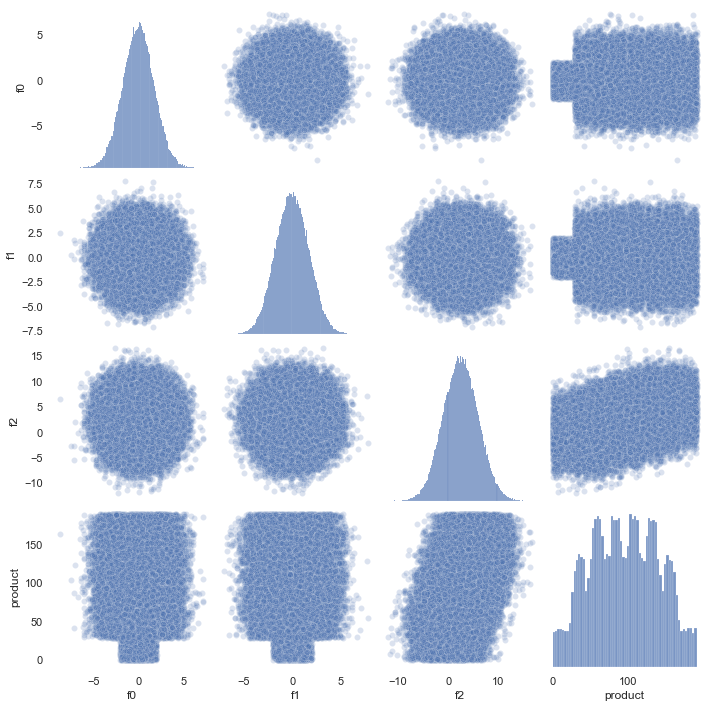

In [8]:
seaborn.set(rc={'axes.facecolor':'white'})
pairplot(df2[['f0', 'f1', 'f2', 'product']], plot_kws={'alpha':0.2})

1. The data is all for all dfs same columns.
2. The data type is float everywhere, we don’t change it
3. No errors/omissions were found in them (since the indicators f0, f1, f2 have an unknown meaning, there is no way for us to check errors such as outliers, etc.). The resulting scaling graphs are nice, they don't show any obvious outliers.
4. It seemed convenient to combine all tables into 1 large one

In [9]:
df0['region'] = 0
df1['region'] = 1
df2['region'] = 2
df = pd.concat([df0, df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       300000 non-null  object 
 1   f0       300000 non-null  float64
 2   f1       300000 non-null  float64
 3   f2       300000 non-null  float64
 4   product  300000 non-null  float64
 5   region   300000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.0+ MB


Just in case, I checked the uniqueness of id, it is not entirely unique.

Created a new temporary dataframe y to add a temporary column to the df dataframe and see these situations.

In [10]:
display(len(df['id'].unique()))
display(len(df0['id'].unique()))
display(len(df1['id'].unique()))
display(len(df2['id'].unique()))

299951

99990

99996

99996

In [11]:
x = df.groupby(by = 'id')['id'].count().sort_values(ascending=False)
y = pd.DataFrame({'count': x})
y

,count
id,
LHZR0,2
bsk9y,2
it2OW,2
wqgPo,2
mpZhE,2
...,...
KbD8O,1
KbC80,1
KbBan,1


In [12]:
df.merge(y, how='left', on='id').query('count==2').sort_values(by='id').head(16)

,id,f0,f1,f2,product,region,count
227380,2tyMi,-1.789602,-1.359044,-4.840745,145.901447,2,2
45429,2tyMi,0.576679,-0.411140,-3.725859,69.292672,0,2
105849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625,1,2
184461,5ltQ6,18.213839,2.191999,3.993869,107.813044,1,2
272896,5ssQt,-0.651825,0.782415,2.690636,120.108761,2,2
16753,5ssQt,-1.005117,0.268726,-0.407822,53.206029,0,2
66136,74z30,1.084962,-0.312358,6.990771,127.643327,0,2
64022,74z30,0.741456,0.459229,5.153109,140.771492,0,2
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364,0,2
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205,0,2


2 situations are visible - the same id for different regions, the same id for 1 region. At the same time, the data is different, that is, it is not a duplicate of the lines.

If there was a dublicate, we could remove it. We can make unique ids by adding the region number (or line index) to the end. But we probably will not use id in any way, so just keep in mind if the need for id suddenly pops up

In [13]:
df.head()

,id,f0,f1,f2,product,region
0,txEyH,0.705745,-0.497823,1.221170,105.280062,0
1,2acmU,1.334711,-0.340164,4.365080,73.037750,0
2,409Wp,1.022732,0.151990,1.419926,85.265647,0
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0


**Conclusion**
1. The data was combined into a single database for the convenience of transformations. added region column to identify where the data came from
2. All data was filled in, had the correct type (float), and since there is no understanding of what is behind the indicators, somehow it is impossible to check the data for errors, no explicit outliers were found.
3. The distribution of data by explanatory variables is a little strange - in 1 regions the indicator is similar to a normal distribution, in others it is not. For example, f1 is similar to normal in regions 2 and 3, while 1 has 3 peaks.
Therefore, it is not entirely clear whether it is possible to build a single model for all 3 regions.
4. Non-unique ids were found, which, according to the conditions of the task, must be unique. The initial hypothesis was that the id data was duplicated due to the combination of databases, but this is not always the case: there is duplication within the region and between regions. must take in consideration if we need to use id


## Building model

In [14]:
results = list()
results_true = list()
n = 0
for data in [df0, df1, df2]:
    df_train, df_valid = train_test_split(data, test_size=0.25, random_state=12345) 
    features_train = df_train.drop(['id', 'product', 'region'], axis=1)
    target_train = df_train['product']
    features_valid = df_valid.drop(['id', 'product', 'region'], axis=1)
    target_valid = df_valid['product']
    features_all = data.drop(['id', 'product', 'region'], axis=1)
    model = LinearRegression()
    model.fit(features_train, target_train)
    results_true.append(target_valid)
    results.append(model.predict(features_valid))
    data['predict_product'] = model.predict(features_all)
    print('Average predicted amount of resource in', n, 'region', results[n].mean(), '')
    print('Average actual amount of resource in', n, 'region', results_true[n].mean(), '')
    print('RMSE of the', n, 'region', sqrt(mean_squared_error(target_valid, results[n])))
    n += 1

Average predicted amount of resource in 0 region 92.59256778438035 
Average actual amount of resource in 0 region 92.07859674082941 
RMSE of the 0 region 37.5794217150813
Average predicted amount of resource in 1 region 68.728546895446 
Average actual amount of resource in 1 region 68.72313602437494 
RMSE of the 1 region 0.8930992867756167
Average predicted amount of resource in 2 region 94.96504596800489 
Average actual amount of resource in 2 region 94.88423280885489 
RMSE of the 2 region 40.02970873393434


**Results**


1. Data were divided into 2 samples for each region. A model for prediction was built
2. Predictions are stored in list results, and correct answers are results_true
3. Estimated average resource amount. In general, model predicted it correctly.
4. In regions 0 and 2, on average, the reserves are higher, almost one and a half times, in comparison with region 1.
5. But the spread of RMSE is higher in them. While in 1 region it close to 0

## Preparation for profit calculation

**Task:**

During the exploration of the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.

The budget for the development of wells in the region is 10 billion rubles.

At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.

After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. Among them, choose the region with the highest average profit.

How do I interpret the conditions:
1. 10 billion is the fixed costs that the company will pay in any case (unless it decides that no option is profitable)
2. When choosing a well, we do not have knowledge about the product, which is available to us in df0, df1, df2.
3. When choosing a region X, we randomly select 500 wells, then we “find out” what amount of oil they give
4. After that, we select only the best 200 wells - we “extract” the oil reserve and sell it for 450 thousand rubles per unit of oil
5. Accordingly, if the total actual oil amount * 450 thousand > 10 billion, then it is profitable, and less is unprofitable.


Constants:

* costs - cost (in thousand rubles) 
* revenue (in thousand rubles)
* how many wells we check checks
* how many pumps we produce

In [15]:
COST = 10*1000*1000
REVENUE = 450
CHECKS = 500
PUMPS = 200

Break-even point - how much oil should be developed in total and how much oil should be on average in 1 well

In [16]:
indif_point = COST / REVENUE 
print('Total amount of oil for break even {:.1f}'.format(indif_point))
print('Average amount of oil for break even {:.2f}'.format(indif_point/PUMPS))

Total amount of oil for break even 22222.2
Average amount of oil for break even 111.11


We give a list of oil wells (checks after a random selection), then select the best

In [17]:
def profit(data, cost, revenue, pumps):
    total_oil = data.sort_values(by='predict_product',ascending=False).head(pumps)['product'].sum()
    return total_oil*revenue-cost

In [18]:
x = df0.head(500)

In [19]:
df0

,id,f0,f1,f2,product,region,predict_product
0,txEyH,0.705745,-0.497823,1.221170,105.280062,0,95.461973
1,2acmU,1.334711,-0.340164,4.365080,73.037750,0,116.227394
2,409Wp,1.022732,0.151990,1.419926,85.265647,0,88.750254
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0,95.419237
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0,114.138969
...,...,...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026,0,116.174856
99996,QKivN,1.392429,-0.382606,1.273912,122.346843,0,96.652519
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443,0,72.401340
99998,7kl59,0.998163,-0.528582,1.583869,74.040764,0,99.337548


In [20]:
profit(x, COST, REVENUE, PUMPS)

403583.17119865306

In [21]:
z = x.sort_values(by='predict_product',ascending=False).head(PUMPS)['product'].sum()
z

23119.073713774786

In [22]:
z * REVENUE

10403583.171198653

In [23]:
z * REVENUE-COST

403583.17119865306

**Results**

1. The intepretation of the task is described
2. 4 constants are defined
3. Added profit function. Tested that it works

## Profit and Risk Calculation

In [24]:
state = RandomState(12345) 
SAMPLES = 1000

In [25]:
profit_results = pd.DataFrame(columns=('region', 'total_profit', 'positive_cases'))
profit_results_all = pd.DataFrame(columns=('region', 'total_profit'))
region = 0
for dfx in [df0, df1, df2]:
    total_profit = 0
    n_positive = 0
    for sample in range(SAMPLES):
        x = dfx.sample(n=CHECKS, replace=True, random_state=state)
        z = profit(x, COST, REVENUE, PUMPS)
        profit_results_all = profit_results_all.append({'region': region, 
                                                'total_profit': z}, ignore_index=True ) 
        total_profit += z
        if z > 0:
            n_positive += 1
    profit_results = profit_results.append({'region': region, 
                                            'total_profit': total_profit, 
                                            'positive_cases':n_positive}, ignore_index=True ) 
    print('region {} calculated'.format(region))
    region += 1

region 0 calculated
region 1 calculated
region 2 calculated


In [26]:
for x in range(3):
    y = profit_results_all.query('region == @x')
    print("Share of negative profit random samples",  x, (pd.Series(y['total_profit']) < 0).mean()*100)

Share of negative profit random samples 0 5.2
Share of negative profit random samples 1 1.0
Share of negative profit random samples 2 8.200000000000001


In [27]:
profit_results

,region,total_profit,positive_cases
0,0.0,424149751.404505,948.0
1,1.0,434821403.118984,990.0
2,2.0,386536639.260031,918.0


In [28]:
profit_results['chance_of_loss'] = 1- profit_results['positive_cases']/SAMPLES
profit_results['average_profit'] = profit_results['total_profit']/SAMPLES
profit_results

,region,total_profit,positive_cases,chance_of_loss,average_profit
0,0.0,424149751.404505,948.0,0.052,424149.751405
1,1.0,434821403.118984,990.0,0.01,434821.403119
2,2.0,386536639.260031,918.0,0.082,386536.63926


In [29]:
profit_results_all

,region,total_profit
0,0.0,200030.25855
1,0.0,96077.412698
2,0.0,94438.188462
3,0.0,428665.059531
4,0.0,668570.013413
...,...,...
2995,2.0,226298.795832
2996,2.0,495783.917166
2997,2.0,265446.622243
2998,2.0,500671.51934


In [30]:
profit_results_all


,region,total_profit
0,0.0,200030.25855
1,0.0,96077.412698
2,0.0,94438.188462
3,0.0,428665.059531
4,0.0,668570.013413
...,...,...
2995,2.0,226298.795832
2996,2.0,495783.917166
2997,2.0,265446.622243
2998,2.0,500671.51934


In [31]:
profit_results_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        3000 non-null   object
 1   total_profit  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [32]:
profit_results_all['total_profit'] = pd.to_numeric(profit_results_all['total_profit'])
profit_results_all['region'] = pd.to_numeric(profit_results_all['region'])

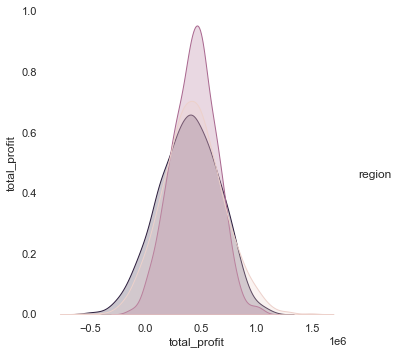

In [33]:
seaborn.set(rc={'axes.facecolor':'white'})

pairplot(profit_results_all[['total_profit', 'region']], plot_kws={'alpha':0.2}, hue="region", height=5)

In [34]:
for x in range(3):
    y = profit_results_all.query('region == @x')
    lower = y['total_profit'].quantile(0.025)
    upper = y['total_profit'].quantile(0.975)
    print('95% confidence interval for profits in {} region: {:.2f} - {:.2f}'.format(x, lower, upper))

95% confidence interval for profits in 0 region: -77856.92 - 968580.70
95% confidence interval for profits in 1 region: 42419.64 - 803845.11
95% confidence interval for profits in 2 region: -146701.55 - 878420.03


## **Conclusions**


1. The confidence interval is calculated, the average profit of 1 observation is in profit_results['average_profit']
2. Region 0 and 2 have too high risk of loss. The reason is  that region 0 and region 2 have a poorer predictive power.
3. An increase in the quality of the prediction model will allow you to get the maximum profit in the 2nd region. in the current situation - region 1 is better